<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="200px">

# **Taller 04:  Statistics**

## **Outline**

1. [Ejercicio 1.](#eje1)
2. [Ejercicio 2.](#eje2)
3. [Ejercicio 3.](#eje3)
4. [Ejercicio 4.](#eje4)
5. [Ejercicio 5.](#eje5)



In [3]:
#@title **Execute this cell**
#@markdown Please include your student id
import sys
import inspect

group_id = "IA1-20252-G1" #@param {type:"string"}
assignment_id = group_id +'.taller_statistic'
student_id = "2225112" #@param {type:"string"}
"""
Put your student ID here

Example: student_id =  '2152145'
"""

"\nPut your student ID here\n\nExample: student_id =  '2152145'\n"

In [4]:
 #@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell

import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name'])
config = Config(server_name='https://bivlabgrader.azurewebsites.net/api')


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

In [19]:
#@title **Import libraries**

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(21)

---
# **Ejercicio 1**  <a name="eje1"></a>
---

# Distribución normal por aproximación (forma empírica)

## Contexto
La forma **empírica** para determinar una distribución normal, partiendo de un conjunto de muestras relativamente grande, corresponde a calcular su promedio y desviación estándar, para luego crear una aproximación a dicha distribución.<br>
Por otra parte, se tiene también la forma **analítica**, que determina la distribución normal por medio del promedio y desviación estándar de la población.


## Tu tarea
Desarrolle una función que **reciba** una muestra (`ns`) de valores numéricos y calcule:
- Cree una distribución normal (`n1`) con promedio 7 y  desviación estándar 0.7 <ins>(No aplique la fórmula del CLT analítico)</ins>.
- Cree una distribución normal **empírica** (`emp`) por medio del promedio y la desviación estándar de la muestra (`ns`) recibida.
- Calcule un intervalo de valores (`x`), entre 4 y 10 con 500 valores.
- **Devuelva** la <ins>distribución</ins> `n1`
- **Devuelva** la <ins>distribución empirica</ins> `emp`
- **Devuelva** el intervalo de valores `x`
- **Devuelva** el <ins>promedio</ins> de la muestra recibida

In [6]:
#@title **code student**

def taller04_20252_p01(ns):
    from scipy import stats
    import numpy as np
    np.random.seed(21)

    n1 = stats.norm(loc=7, scale=0.7)
    emp = stats.norm(loc=np.mean(ns), scale=np.std(ns))
    x = np.linspace(4, 10, 500)
    avg = np.mean(ns)

    return n1, emp, x, avg

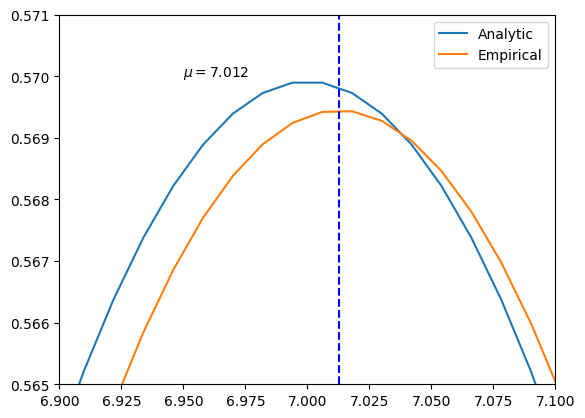

In [7]:
#@title **check your answer**
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

b = np.random.normal(7, 0.7, 10000)

a, e, x, avg = taller04_20252_p01(b)
d1 = a.pdf(x)
d2 = e.pdf(x)
plt.plot(x, d1, label="Analytic")
plt.plot(x, d2, label="Empirical")
plt.axvline(x=avg, color='blue', linestyle='--')
plt.text(6.95, 0.57, "$\\mu=$"+str(avg)[:5])
plt.xlim([6.9, 7.1])
plt.ylim([0.565, 0.571])
plt.legend()
plt.show()

## ✅ Salidas esperadas

<img src="https://drive.google.com/thumbnail?id=1cE441DrI7zZvsoxAbm4v3ficqBduCpjE&sz=w600" />

In [8]:
#@title **send your answer**
student_func_str = inspect.getsource(taller04_20252_p01)
r = check_solution_and_evaluate(assignment_id, student_func_str)

Score
	5.0
Message
	Excellent, you got the highest score.


---
# **Ejercicio 2**  <a name="eje2"></a>
---

# Distribución con múltiples gaussianas

## Contexto
En ocasiones, algunos fenómenos de la ingeniería se comportan con una combinación de dos o más distribuciones normales. En estos casos, es posible describir una distribución con múltiples gaussianas mediante sus promedios y desviaciones estándar. Posteriormente, se acostumbra a ponderar cada gaussiana con algún método determinado.

## Tu Tarea

Complete la función que reciba un número (`n`) de muestras y que haga un muestreo en donde:

- El 30% de las (`n`) muestras **provenga** de una distribución normal $\sim \mathcal{N}(3, \ 1.5)$
- El 70% de las (`n`) muestras **provenga** de una distribución normal $\sim \mathcal{N}(7, \ 0.7)$
- **Devuelva** la <ins>**PERMUTACIÓN**</ins> de las (`n`) muestras provenientes de las dos distribuciones en total.
<br>

<ins>**Nota:**</ins> utilice la función `np.random.normal()`<br>
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
<br><br>
<ins>**Nota:**</ins> utilice la función `np.random.permutation()`<br> https://numpy.org/doc/2.0/reference/random/generated/numpy.random.permutation.html

In [9]:
#@title **code student**

def taller04_20252_p02(n):
    import numpy as np
    np.random.seed(21)

    m = np.random.permutation(np.concatenate((np.random.normal(3, 1.5, int(n*0.3)), np.random.normal(7, 1, int(n*0.7)))))

    return m

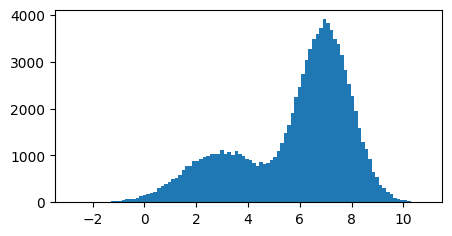

In [10]:
#@title **check your answer**
import matplotlib.pyplot as plt
import numpy as np

a = taller04_20252_p02(100000)

plt.figure(figsize=(5, 2.5))
plt.hist(a, bins=100)
plt.show()

## ✅ Salidas esperadas

<img src="https://drive.google.com/thumbnail?id=1My3Yv5L2E-WDHzxx0NK5pwxycCOb8oX0&sz=w600" />

In [11]:
#@title **send your answer**
student_func_str = inspect.getsource(taller04_20252_p02)
r = check_solution_and_evaluate(assignment_id, student_func_str)

Score
	5.0
Message
	Excellent, you got the highest score.


---
# **Ejercicio 3**  <a name="eje3"></a>
---

## Distribución de Poisson

## Contexto
La distribución de Poisson se utiliza para describir fenómenos cuya ocurrencia es poco frecuente y está dada por la expresión:
$$P(x) = \frac{\lambda^{x} e^{-\lambda}}{x!}$$

## Tu tarea

Complete la siguiente función que **reciba** un número (`a`) que corresponde al límite inferior, y un número (`b`) que será el límite superior, y que:

- Obtenga $10000$ muestras de una distribución de Poisson **aproximada** con $\lambda = 4$
- **Devuelva** las 10000 muestras.
- Calcule la probabilidad **aproximada** de obtener elementos tales que $a \leq x \leq b$ &nbsp;&nbsp; $\frac{eventos}{intervalo-tiempo}$.
- **Devuelva** dicha probabilidad (`prob1`).

- Obtenga $10000$ muestras de una distribución de Poisson **ANALÍTICA (EXACTA)** con $\lambda = 4$
- **Devuelva** las 10000 muestras.

- Calcule la probabilidad **ANALÍTICA (EXACTA)** de obtener elementos tales que $a \leq x \leq b$ &nbsp;&nbsp; $\frac{eventos}{intervalo-tiempo}$.
- **Devuelva** dicha probabilidad (`prob2`).
<br>

<ins>**Nota:**</ins> utilice la función `np.random.poisson()`<br>
https://numpy.org/doc/2.2/reference/random/generated/numpy.random.poisson.html


In [26]:
#@title **code student**

def taller04_20252_p03(a,b):
  import numpy as np
  import math
  from scipy.stats import poisson
  np.random.seed(21)

  x = np.random.poisson(4, 10000)
  prob1 = np.mean((x >= a) & (x <= b))
  r = np.random.poisson(4, 10000)
  #prob2 = np.sum((r >= a) & (r <= b))/10000
  #prob2 = poisson.cdf(b, 4) - poisson.cdf(a - 1, 4)
  
  prob2 = 0
  for k in range(a, b + 1):
    prob2 += poisson.pmf(k, 4)
  return x, prob1, r, prob2

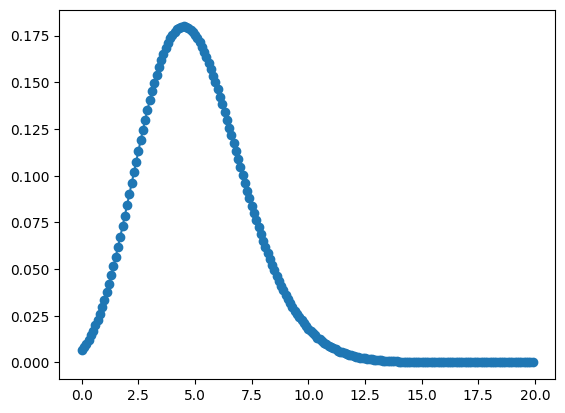

In [27]:
#@title **check your answer**
import numpy as np
from scipy.special import factorial

a = 2
b = 7
x, y, v, w = taller04_20252_p03(a, b)
t = np.arange(0,20,0.1)
d = np.exp(-5)*np.power(5, t)/factorial(t)

plt.plot(t, d, marker="o")
plt.show()

## ✅ Salidas esperadas
<img src="https://drive.google.com/thumbnail?id=1TpI-qrrY95Pg7cMqvbttCronvXxc-HTg&sz=w600" />


In [28]:
#@title **send your answer**
student_func_str = inspect.getsource(taller04_20252_p03)
r = check_solution_and_evaluate(assignment_id, student_func_str)

Score
	3.333333333333333
Message
	1. The approximate probability is not correct.
	2. The exact probability is not correct.
Status
	You have achieved your best score: 3.333333333333333


---
# **Ejercicio 4**  <a name="eje4"></a>
---

## Probabilidad en un intervalo definido

## Contexto
Se tienen dos distribuciones estadísticas:<br>
$\mathcal{N}_{1}(5.28, 0.91)$ &nbsp;&nbsp; y &nbsp;&nbsp; $\mathcal{N}_{2}(8.45, 1.36)$

y además, se conoce el valor en el eje horizontal que corresponde a la intersección de sus pdf (Probability density function):

<img src="https://drive.google.com/thumbnail?id=1QOhSdVfJDWNnZVpFwFvIMdkUAwkTluJl&sz=w800" />



## Tu tarea

Implementar una función que **reciba** como parámetro la intersección (`int`) entre las dos distribuciones anteriores, y que:
- Calcule la probabilidad del area coloreada en verde
- **Devuelva** dicha probabilidad

<ins>**Nota:**</ins> asuma que el valor de la intersección es &nbsp; $x=6.70458$

In [30]:
#@title **code student**

def taller04_20252_p04(ins):
  import numpy as np
  from scipy import stats
  np.random.seed(21)

  n1 = stats.norm(loc=5.28, scale=0.91)
  n2 = stats.norm(loc=8.45, scale=1.36)
    
  p = (1 - n1.cdf(ins)) + n2.cdf(ins)

  return p

0.15841257895451555


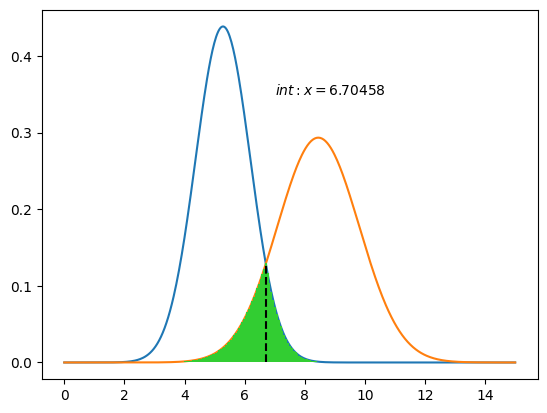

In [31]:
#@title **check your answer**
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

print(taller04_20252_p04(6.70458))

n1 = stats.norm(loc=5.28, scale=0.91)
n2 = stats.norm(loc=8.45, scale=1.36)
t = np.linspace(0,15,500)
plt.plot(t, n1.pdf(t))
plt.plot(t, n2.pdf(t))
for i in np.linspace(4, 6.7, 50):
  plt.vlines(x=i, ymin=0, ymax=n2.pdf(i), color='limegreen', linestyle='-')
for i in np.linspace(6.7, 8.5, 30):
  plt.vlines(x=i, ymin=0, ymax=n1.pdf(i), color='limegreen', linestyle='-')
plt.text(7, 0.35, "$int: x=6.70458$")
plt.vlines(x=6.7, ymin=0, ymax=n2.pdf(6.70458), color='black', linestyle='--')
plt.show()

## ✅ Salidas esperadas
0.15841257895451555<br>
<img src="https://drive.google.com/thumbnail?id=1QOhSdVfJDWNnZVpFwFvIMdkUAwkTluJl&sz=w800" />

In [32]:
#@title **send your answer**
student_func_str = inspect.getsource(taller04_20252_p04)
r = check_solution_and_evaluate(assignment_id, student_func_str)

Score
	5.0
Message
	Excellent, you got the highest score.


---
# **Ejercicio 5**  <a name="eje5"></a>
---

# CLT sobre un dataset

## Contexto:
Considere el dataset `FiveYearData.csv` el cual contiene información sobre la expectativa de vida y el gdp de diferentes países del mundo.


## Tu tarea
Implemente una función que **reciba** un dataset (`df`) y que:
- **Elimine** los valores nulos del dataset.
- Tome como población a la columna `["gdpPercap"]` y calcule su promedio y desviación.
- Aplique el teorema del límite central (CLT) a dicha columna, con `N=10` y `100` combinaciones posibles, y:
- Obtenga mediante la forma <ins>empírica</ins>, la distribución normal aproximada.
- **Devuelva** la distribución normal **empírica**.
- Obtenga mediante la forma <ins>analítica</ins>, la distribución normal aproximada.
- **Devuelva** la distribución normal **analítica**.
- Para la distribución normal **analítica**:
  - **Devuelva** el elemento ubicado en el `Percent point function` (`ppf`) para un valor de 1.
  - **Devuelva** el elemento ubicado en el `Percent point function` (`ppf`) para un valor de 99.


In [33]:
#@title **code student**

def taller04_20252_p05(df):
    import pandas as pd
    import numpy as np
    from scipy import stats

    np.random.seed(21)

    # 1. Eliminar valores nulos
    df = df.dropna()

    # 2. Extraer la población
    pop = df["gdpPercap"]
    avg = np.mean(pop)
    std = np.std(pop)

    # 3. Forma empírica: 100 combinaciones de medias de muestras de tamaño N=10
    N = 10
    sample_means = []
    for _ in range(100):
        sample = np.random.choice(pop, size=N, replace=True)
        sample_means.append(np.mean(sample))
    emp = stats.norm(loc=np.mean(sample_means), scale=np.std(sample_means))

    # 4. Forma analítica: distribución normal con media poblacional y desviación ajustada
    analytic = stats.norm(loc=avg, scale=std / np.sqrt(N))

    # 5. Percent point function (ppf) para valores 1 y 99
    ppf_1 = analytic.ppf(0.01)
    ppf_99 = analytic.ppf(0.99)

    return emp, analytic, ppf_1, ppf_99


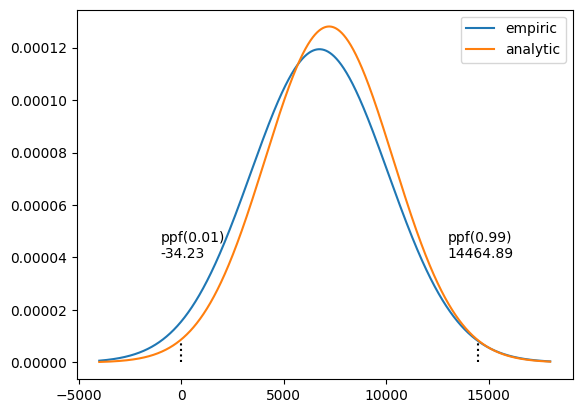

In [34]:
#@title **check your answer**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://drive.google.com/uc?id=1T9kXNhw2qZlYT8moenOKxJnUOQL5DiiG")
a = taller04_20252_p05(df)
t = np.linspace(-4000,18000,15000)
plt.plot(t, a[0].pdf(t), label="empiric")
plt.plot(t, a[1].pdf(t), label="analytic")
plt.vlines(x=a[2], ymin=0, ymax=a[1].pdf(a[2]), color='black', linestyle=':')
plt.vlines(x=a[3], ymin=0, ymax=a[1].pdf(a[3]), color='black', linestyle=':')
plt.text(-1000, 0.00004, "ppf(0.01)\n"+str(a[2])[:6])
plt.text(13000, 0.00004, "ppf(0.99)\n"+str(a[3])[:8])
plt.legend()
plt.show()

## ✅ Salidas esperadas

<img src="https://drive.google.com/thumbnail?id=1KU02hRus2Qn1sXUSI8lw2mWb3pttyIYV&sz=w800" />


In [35]:
#@title **send your answer**
student_func_str = inspect.getsource(taller04_20252_p05)
r = check_solution_and_evaluate(assignment_id, student_func_str)

Score
	5.0
Message
	Excellent, you got the highest score.


---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;"/>